Execute this cell if you are running this notebook directly from the git repository's `notebooks` directory.

In [1]:
%cd ../

/home/ms/prg/pendulum


Execute this cell if you are running this notebook from a Google Colab notebook.

In [2]:
!pip install pendulum

Arrange imports

In [3]:
from pendsim import sim, controller, viz
import numpy as np
import matplotlib.pyplot as plt

Create a pendulum with a 2kg cart, 1kg mass, and 0.5-meter length

In [4]:
pend = sim.Pendulum(
    2.0,
    1.0,
    2,0,
    initial_state = np.array([0.0, 0.0, 0.1, 0.0])
)

Create a PID controller with gains `kp`, `ki`, `kd`.

In [5]:
kp, ki, kd = 20.0, 0.0, 0
cont = controller.PID( (kp, ki, kd) )

Create a simulation object with a timestep `dt`, run time `t_final`, and an 20N impulse force that peaks at t= 2seconds

In [6]:
dt, t_final = 0.01, 8.0
def force(t):
    return 20 * np.exp( -((t-2.0)/0.1)**2 )

simu = sim.Simulation(dt, t_final, force)

Run the simulation with the pendulum and controller we created and store the simulation results into `results`

In [7]:
results = simu.simulate(pend, cont)

100%|█████████████████████████████████████████████████████| 800/800 [00:00<00:00, 2472.85it/s]


Create a plot of the four states as a function of time

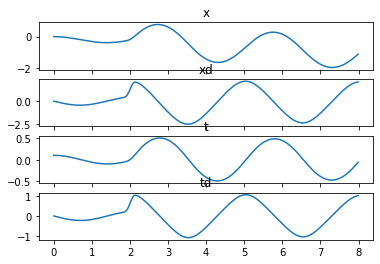

In [8]:
fig, ax = plt.subplots(nrows=4, sharex=True)
state_labels = ["x", "xd", "t", "td"]
for i, s in enumerate(state_labels):
    ax[i].plot(results[("state", s)], label="state")
    ax[i].set_title(s)

Make an animation of the simulation. Make sure to bind the result of `visu.animate()` to a variable, because that is required in order to ensure that the animation will actually run.

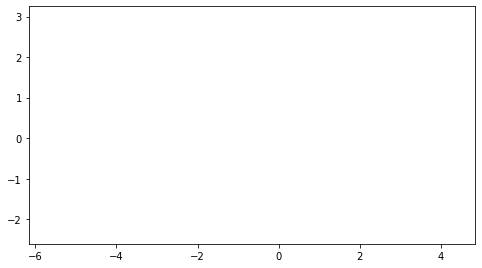

In [9]:
visu = viz.Visualizer(results, pend, speed=1)
ani = visu.animate(blit=False)

In web-based notebooks, animations may not display correctly with just the matplotlib plots. It may be necessary to run the following cell to render and view an HTML5 video of the animation.

In [11]:
from IPython.display import HTML
HTML(ani.to_html5_video())